In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

import random
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,MaxPooling2D,Conv2D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


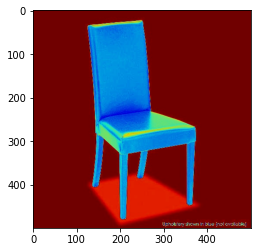

In [3]:
Data_dir="/content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/Process Thermal Images"
Categories=['chair','humans','bed','sofa','table']

for i in Categories:
    folder_path=os.path.join(Data_dir,i)
    for img in os.listdir(folder_path):
        image_read=os.path.join(folder_path,img)
        image_array=cv2.imread(image_read,cv2.COLOR_BGR2GRAY)
        plt.imshow(image_array,cmap='gray')
        plt.show()
        break
    break

In [4]:
print(image_array.shape)

(500, 500, 3)


In [5]:
IMG_SIZE=250


In [6]:
training_data=[]

def create_training_data():
    for i in Categories:
        print(i)
        folder_path=os.path.join(Data_dir,i)
        category_index=Categories.index(i)
        for img in os.listdir(folder_path):
            image_read=os.path.join(folder_path,img)
            image_array=cv2.imread(image_read,cv2.COLOR_BGR2GRAY)
            new_array=cv2.resize(image_array,(IMG_SIZE,IMG_SIZE)) 
            training_data.append([new_array,category_index])

create_training_data()

chair
humans
bed
sofa
table


In [7]:
training_data

[[array([[[112,   0,   0],
          [112,   0,   0],
          [112,   0,   0],
          ...,
          [112,   0,   0],
          [112,   0,   0],
          [112,   0,   0]],
  
         [[112,   0,   0],
          [112,   0,   0],
          [112,   0,   0],
          ...,
          [112,   0,   0],
          [112,   0,   0],
          [112,   0,   0]],
  
         [[112,   0,   0],
          [112,   0,   0],
          [112,   0,   0],
          ...,
          [112,   0,   0],
          [112,   0,   0],
          [112,   0,   0]],
  
         ...,
  
         [[112,   0,   0],
          [112,   0,   0],
          [112,   0,   0],
          ...,
          [122,   0,   2],
          [114,   0,   0],
          [112,   0,   0]],
  
         [[112,   0,   0],
          [112,   0,   0],
          [112,   0,   0],
          ...,
          [120,   0,   3],
          [113,   0,   0],
          [112,   0,   0]],
  
         [[112,   0,   0],
          [112,   0,   0],
          [112,   0,   0

In [8]:
random.shuffle(training_data)

In [9]:
features=[]
labels=[]

In [10]:
for i,j in training_data:
    features.append(i)
    labels.append(j)

In [11]:
len(features),len(labels)

(1040, 1040)

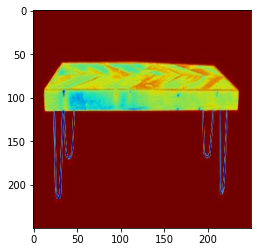

In [12]:
plt.imshow(features[2])
plt.show()

In [13]:
features=np.array(features,dtype='float32')
labels= np.array(labels,dtype='int32')
features

array([[[[197.,   9.,   1.],
         [226.,  39.,  11.],
         [224.,  41.,   6.],
         ...,
         [226.,  93.,   1.],
         [224.,  98.,   0.],
         [225., 101.,   0.]],

        [[197.,   8.,   1.],
         [226.,  39.,  11.],
         [224.,  41.,   7.],
         ...,
         [225.,  92.,   1.],
         [224.,  97.,   0.],
         [224., 100.,   0.]],

        [[199.,   8.,   1.],
         [227.,  40.,  12.],
         [224.,  41.,   7.],
         ...,
         [225.,  91.,   1.],
         [224.,  96.,   0.],
         [223.,  99.,   0.]],

        ...,

        [[231., 202.,   3.],
         [226., 196.,   0.],
         [223., 192.,   0.],
         ...,
         [198., 226.,  19.],
         [197., 226.,  19.],
         [198., 225.,  20.]],

        [[228., 197.,   2.],
         [226., 195.,   0.],
         [229., 198.,   3.],
         ...,
         [197., 226.,  19.],
         [197., 227.,  21.],
         [197., 226.,  21.]],

        [[225., 193.,   0.],
       

In [14]:
labels

array([2, 1, 4, ..., 2, 2, 3], dtype=int32)

In [15]:
labels

array([2, 1, 4, ..., 2, 2, 3], dtype=int32)

In [16]:
len(features),len(labels)

(1040, 1040)

In [17]:
features

array([[[[197.,   9.,   1.],
         [226.,  39.,  11.],
         [224.,  41.,   6.],
         ...,
         [226.,  93.,   1.],
         [224.,  98.,   0.],
         [225., 101.,   0.]],

        [[197.,   8.,   1.],
         [226.,  39.,  11.],
         [224.,  41.,   7.],
         ...,
         [225.,  92.,   1.],
         [224.,  97.,   0.],
         [224., 100.,   0.]],

        [[199.,   8.,   1.],
         [227.,  40.,  12.],
         [224.,  41.,   7.],
         ...,
         [225.,  91.,   1.],
         [224.,  96.,   0.],
         [223.,  99.,   0.]],

        ...,

        [[231., 202.,   3.],
         [226., 196.,   0.],
         [223., 192.,   0.],
         ...,
         [198., 226.,  19.],
         [197., 226.,  19.],
         [198., 225.,  20.]],

        [[228., 197.,   2.],
         [226., 195.,   0.],
         [229., 198.,   3.],
         ...,
         [197., 226.,  19.],
         [197., 227.,  21.],
         [197., 226.,  21.]],

        [[225., 193.,   0.],
       

In [18]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(250,250,3)))
model.add(MaxPooling2D(2))

#model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))

#model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',  metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 61, 61, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       7

In [19]:
model.fit(features,labels,batch_size=32,epochs=50,validation_split=0.2)


Epoch 1/50
26/26 [==============================] - 8s 200ms/step - loss: 36.3013 - accuracy: 0.2067 - val_loss: 1.6081 - val_accuracy: 0.2548
Epoch 2/50
26/26 [==============================] - 4s 159ms/step - loss: 1.6279 - accuracy: 0.2236 - val_loss: 1.6027 - val_accuracy: 0.2548
Epoch 3/50
26/26 [==============================] - 4s 148ms/step - loss: 1.5996 - accuracy: 0.2464 - val_loss: 1.5848 - val_accuracy: 0.3654
Epoch 4/50
26/26 [==============================] - 4s 147ms/step - loss: 1.5742 - accuracy: 0.2596 - val_loss: 1.5501 - val_accuracy: 0.3702
Epoch 5/50
26/26 [==============================] - 4s 148ms/step - loss: 1.5598 - accuracy: 0.2800 - val_loss: 1.5480 - val_accuracy: 0.3990
Epoch 6/50
26/26 [==============================] - 4s 148ms/step - loss: 1.5312 - accuracy: 0.3377 - val_loss: 1.5027 - val_accuracy: 0.4038
Epoch 7/50
26/26 [==============================] - 4s 148ms/step - loss: 1.4220 - accuracy: 0.4207 - val_loss: 1.4433 - val_accuracy: 0.4087
Epoch

In [20]:
model.history.history

{'accuracy': [0.20673076808452606,
  0.22355769574642181,
  0.24639423191547394,
  0.25961539149284363,
  0.28004807233810425,
  0.33774039149284363,
  0.42067307233810425,
  0.41225960850715637,
  0.4447115361690521,
  0.4483173191547394,
  0.5168269276618958,
  0.5324519276618958,
  0.5300480723381042,
  0.5588942170143127,
  0.5925480723381042,
  0.5949519276618958,
  0.6310096383094788,
  0.6382211446762085,
  0.6189903616905212,
  0.661057710647583,
  0.65625,
  0.6911057829856873,
  0.6862980723381042,
  0.7103365659713745,
  0.707932710647583,
  0.6802884340286255,
  0.7307692170143127,
  0.7163461446762085,
  0.7415865659713745,
  0.7536057829856873,
  0.745192289352417,
  0.7596153616905212,
  0.754807710647583,
  0.8197115659713745,
  0.786057710647583,
  0.776442289352417,
  0.8112980723381042,
  0.8245192170143127,
  0.8161057829856873,
  0.8413461446762085,
  0.832932710647583,
  0.8605769276618958,
  0.8762019276618958,
  0.8689903616905212,
  0.8533653616905212,
  0.8485

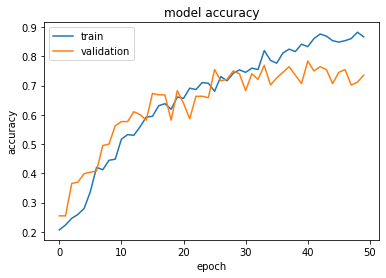

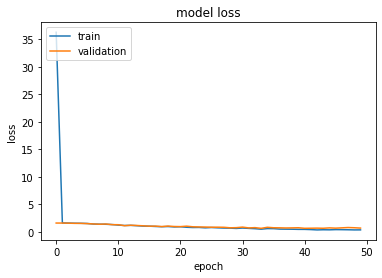

In [21]:
#  "Accuracy"
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
model.save("/content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/model_multiclassification_final")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/model_multiclassification_final/assets


## Testing the Model

In [23]:
import keras

import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

import random
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,MaxPooling2D,Conv2D

model_main=keras.models.load_model("/content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/model_multiclassification_final")
def predict_Video(frame):
    # try_data_path = path
    # try_data = cv2.imread(frame, cv2.IMREAD_GRAYSCALE)
    # Resizing the image and reshaping the image so it can pass the Convolutional Layer as a 4D arrays
    resized_try_data = cv2.resize(frame, (200, 200))
    try_data_resized = resized_try_data.reshape(1, 200, 200, 3)# Check the shape of the resized image arrays
    # print(try_data_resized.shape)

    plt.imshow(try_data_resized[0], cmap='gray')
    # Declare the new data as Xnew
    Xnew = try_data_resized
    # make a prediction using the trained models
    ynew = model_main.predict(Xnew)
    print(ynew)
    return ynew
    # print(type(ynew[0])
    # show the predicted Outputs




# Passing Image


[[0.03719632 0.00229414 0.86374503 0.09377857 0.00298601]]
bed
[2]


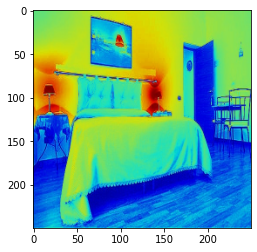

In [29]:
Categories=['chair','humans','bed','sofa','table']
import keras
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

import random
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,MaxPooling2D,Conv2D
model_main=keras.models.load_model("/content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/model_multiclassification_final")
def predict_Video(frame):
    # try_data_path = path
    try_data = cv2.imread(frame, cv2.COLOR_BGR2RGB)
    # Resizing the image and reshaping the image so it can pass the Convolutional Layer as a 4D arrays
    resized_try_data = cv2.resize(try_data, (250, 250))
    try_data_resized = resized_try_data.reshape(1,250, 250, 3)# Check the shape of the resized image arrays
    # print(try_data_resized.shape)
    plt.imshow(try_data_resized[0], cmap='gray')
    # Declare the new data as Xnew
    Xnew = try_data_resized
    # make a prediction using the trained models
    ynew = model_main.predict(Xnew)
    print(ynew)
    return ynew
    # print(type(ynew[0])
    # show the predicted Outputs
returned_result=predict_Video("/content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/Process Thermal Images/bed/bed_7.jpg")
print(Categories[np.argmax(returned_result,axis=1)[0]])
# print('------Returned Result--------',returned_result)
print(np.argmax(returned_result,axis=1))

[[9.1328913e-01 5.3931528e-04 5.8384564e-02 2.1647485e-02 6.1394959e-03]]
chair
[0]


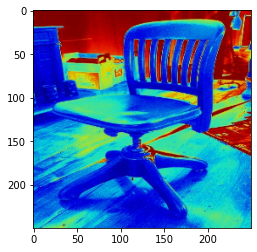

In [25]:
returned_result=predict_Video("/content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/Process Thermal Images/chair/chair_1.jpg")
print(Categories[np.argmax(returned_result,axis=1)[0]])
print(np.argmax(returned_result,axis=1))

[[2.0124018e-02 2.1957420e-04 5.9833177e-03 9.7092080e-01 2.7522750e-03]]
sofa
[3]


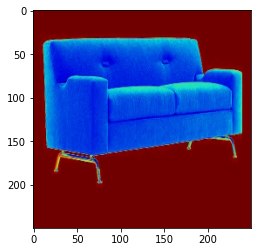

In [26]:
returned_result=predict_Video("/content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/Process Thermal Images/sofa/sofa_10.jpg")
print(Categories[np.argmax(returned_result,axis=1)[0]])
print(np.argmax(returned_result,axis=1))

[[2.2477613e-04 2.1218408e-08 1.0916496e-07 4.6670866e-06 9.9977046e-01]]
table
[4]


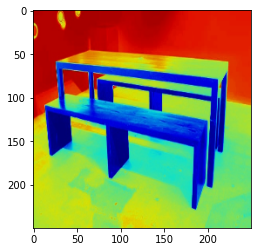

In [27]:
returned_result=predict_Video("/content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/Process Thermal Images/table/table_1.jpg")
print(Categories[np.argmax(returned_result,axis=1)[0]])
print(np.argmax(returned_result,axis=1))

[[7.9679088e-04 9.9906093e-01 3.3042601e-05 2.2939739e-06 1.0695363e-04]]
humans
[1]


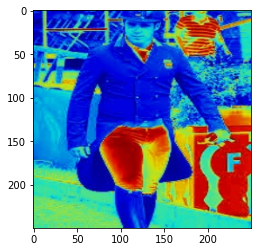

In [28]:
returned_result=predict_Video("/content/drive/MyDrive/AIDI/Sem_2/AIDI Final Project/Process Thermal Images/humans/humans_101.jpg")
print(Categories[np.argmax(returned_result,axis=1)[0]])
print(np.argmax(returned_result,axis=1))